In [133]:
import pandas as pd
import matplotlib.pyplot as plt


#use o encoding por causa do tipo de padrão que vem fonte: https://www.roelpeters.be/unicodedecodeerror-utf-8-codec-cant-decode-byte-in-position/
df_chamados = pd.read_csv(r'C://Users/OSO/Documents/KPIS Suporte/chamados.csv', encoding = 'ISO-8859-1', sep=';')
#limpando df chamados
df_chamados = df_chamados.drop(['.', 'ÚLTIMO COMENTÁRIO', 'DIAS SEM AÇÃO', 'PRODUTO', 'RESUMO'], axis=1)

#criando chamados resolvidos sem 'aberto em'
df_chamados_resolvidos = df_chamados.drop('ABERTO EM', axis=1)

#remover linhas sem a data de resolução '-'
df_chamados_resolvidos = df_chamados_resolvidos[(df_chamados_resolvidos['RESOLVIDO EM'] != '-')]

#converter valor da tabela para data (atualmente esta como object)
df_chamados['ABERTO EM'] = pd.to_datetime(df_chamados['ABERTO EM'], format = '%d/%m/%Y')

df_chamados_resolvidos['RESOLVIDO EM'] = pd.to_datetime(df_chamados_resolvidos['RESOLVIDO EM'], format = '%d/%m/%Y')

#adicionar colunas de ano, mes e dia
df_chamados["Ano"] = df_chamados['ABERTO EM'].dt.year
df_chamados['Mes'] = df_chamados['ABERTO EM'].dt.month
df_chamados['Dia'] = df_chamados['ABERTO EM'].dt.day
df_chamados_resolvidos["Ano"] = df_chamados_resolvidos['RESOLVIDO EM'].dt.year
df_chamados_resolvidos['Mes'] = df_chamados_resolvidos['RESOLVIDO EM'].dt.month
df_chamados_resolvidos['Dia'] = df_chamados_resolvidos['RESOLVIDO EM'].dt.day

#df_chamados.info()
#df_chamados_resolvidos.info()

In [134]:
#FORMAS de FILTRAR
# df_filtro2022 = df_chamados["Ano"] == 2022
# df_chamados2022 = df_chamados[df_filtro2022]
# display(df_chamados2022)

df_2022 = df_chamados[df_chamados.Ano.eq(2022)]
#display(df2022.head())
#df2022.info()

#df só de 2022 de resolvidos
df_resolv_2022 = df_chamados_resolvidos[df_chamados_resolvidos.Ano.eq(2022)]

In [220]:
df_chamados['CHAMADO'].count()
df_chamados_resolvidos['CHAMADO'].count()
tot_backlog = df_chamados['CHAMADO'].count() - df_chamados_resolvidos['CHAMADO'].count()
print(tot_backlog)

398


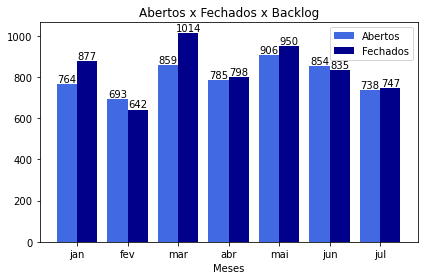

In [215]:
lst_2022 = list(df_2022['Mes'].value_counts().sort_index())

lst_resolv_2022 = list(df_resolv_2022['Mes'].value_counts().sort_index())

#para colunas agrupadas tem que ser array
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) #cria o array com os meses do eixo x
eixo_x = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'] #para etiquetar o eixo x
width_custom  = 0.4 #largura da barra

fig, ax = plt.subplots()
barra_abertos = ax.bar(x[:len(lst_2022)] - width_custom/2, lst_2022, width = width_custom, color = 'royalblue', label="Abertos" )
barra_fechados = ax.bar(x[:len(lst_2022)] + width_custom/2, lst_resolv_2022, width= width_custom, color='darkblue', label="Fechados")

#plt.bar(x[:len(lst_2022)] - width_custom, lst_2022, width = width_custom, color = 'blue', label = 'Abertos')
#plt.bar(x[:len(lst_2022)], lst_resolv_2022, width = width_custom, color = 'cyan', label = 'Fechados' )
plt.legend()
plt.title("Abertos x Fechados x Backlog")
plt.xlabel('Meses')
plt.xticks(x[:len(lst_2022)], eixox[:len(lst_2022)])

ax.bar_label(barra_abertos) #colocar rotulo na barra
ax.bar_label(barra_fechados)#colocar rotulo na barra
fig.tight_layout()
plt.show()